In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

Get the random numbers using the Uniform distribution and then Visualize them


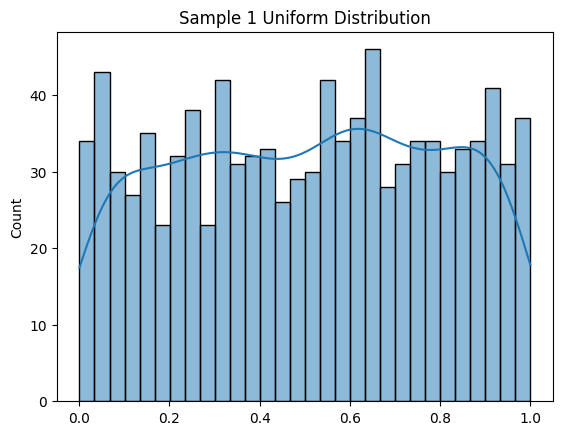

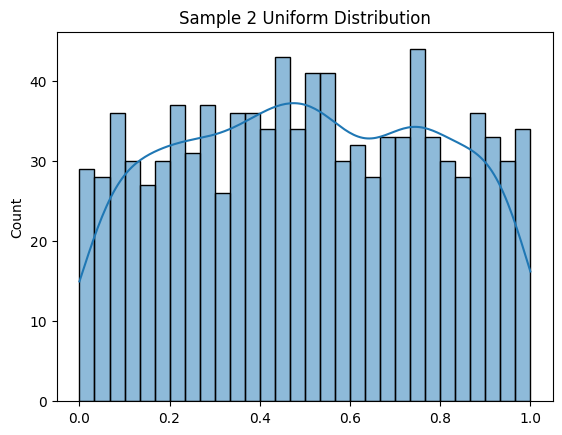

In [11]:
class uniform_distributions:
    def __init__(self,mean,variance) -> None:
        self.variance = variance
        self.mean = mean
        print('Get the random numbers using the Uniform distribution and then Visualize them')
    def get_samples(self):
        sample_1 = np.random.uniform(self.mean,self.variance,1000)
        sample_2 = np.random.uniform(self.mean,self.variance,1000)
        return sample_1,sample_2
    
    def plot_samples(self):
        sample_1,sample_2 = self.get_samples()

        # Visualize the Sample 1
        plt.figure()
        sns.histplot(sample_1,bins=30,kde=True)
        plt.title('Sample 1 Uniform Distribution')
        plt.show()

        # Visualize the Sample 2
        plt.figure()
        sns.histplot(sample_2,bins=30,kde=True)
        plt.title('Sample 2 Uniform Distribution')
        plt.show()
obj = uniform_distributions(0,1)
obj.plot_samples()


We would sample Gaussian from the Uniform Distribution 


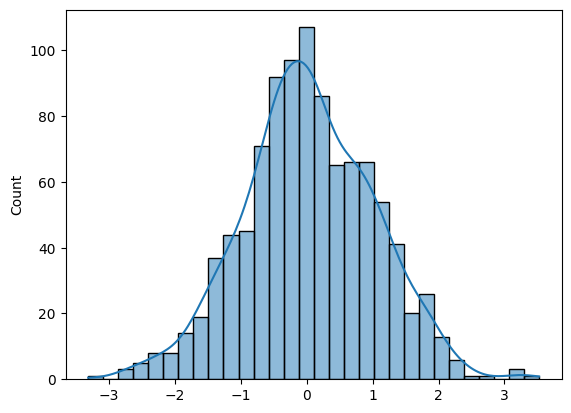

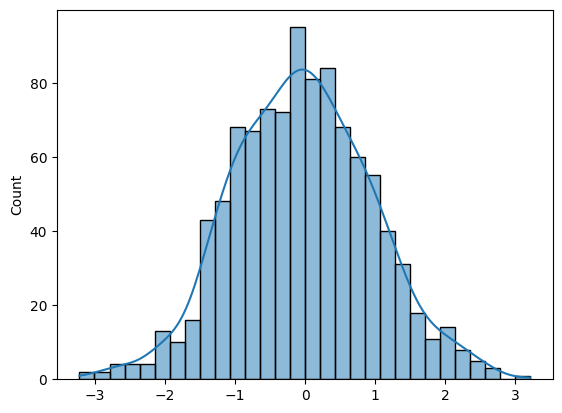

In [21]:
class univariate_gaussain(uniform_distributions):
    def __init__(self,mean,variance):
        self.variance = variance
        self.mean = mean
        print('We would sample Gaussian from the Uniform Distribution ')
    def univariate(self):
        u1,u2 = super().get_samples()
        z1 = (np.sqrt(-2*np.log(u1)))*np.cos(2*np.pi*u2)
        z2 = (np.sqrt(-2*np.log(u1)))*np.sin(2*np.pi*u2)
        return z1,z2
    def plot_univariate(self):
        z1,z2 = self.univariate()
        plt.figure()
        sns.histplot(z1,bins=30,kde=True)
    
        plt.show()

        plt.figure()
        sns.histplot(z2,bins=30,kde=True)
     
        plt.show()
obj_univariate = univariate_gaussain(0,1)
obj_univariate.plot_univariate()

Sampling of the Multivariate Gaussian


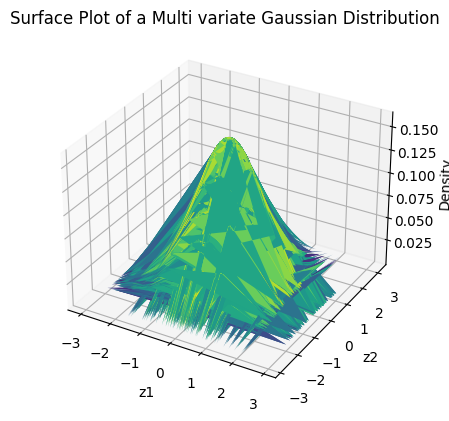

In [24]:
class multivariate_gaussian(univariate_gaussain):
    def __init__(self, mean, variance):
        self.mean = mean
        self.variance = variance
        print('Sampling of the Multivariate Gaussian')
    def covariance_of_uniG(self):
        z1,z2 = super().univariate()
        covariance = np.cov(z1,z2)
        return covariance
    def multivariate(self):
        z1,z2 = super().univariate()
        cov = self.covariance_of_uniG()
        mean = [0,0]
        Z1,Z2 = np.meshgrid(z1,z2)
        pos = np.dstack((Z1,Z2))
        mv = multivariate_normal(mean,cov)
        probability_distribution = mv.pdf(pos)
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(Z1, Z2, probability_distribution, cmap='viridis')
        ax.set_title('Surface Plot of a Multi variate Gaussian Distribution')
        ax.set_xlabel('z1')
        ax.set_ylabel('z2')
        ax.set_zlabel('Density')
        plt.show()
obj_multivar = multivariate_gaussian(0,1) 
obj_multivar.multivariate()    
    